In [120]:
import mne
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from MNE_Pipeline import MNE_Repo_Mat
import cv2
%matplotlib inline

In [63]:
mp = MNE_Repo_Mat()

info = mp.construct_info()

/home/kam/anaconda3/envs/mne/lib/python3.7/site-packages/mne/utils/docs.py:830: DeprecationWarning: Function read_montage is deprecated; ``read_montage`` is deprecated and will be removed in v0.20. Please use ``read_dig_fif``, ``read_dig_egi``, ``read_custom_montage``, or ``read_dig_captrack`` to read a digitization based on your needs instead; or ``make_standard_montage`` to create ``DigMontage`` based on template; or ``make_dig_montage`` to create a ``DigMontage`` out of np.arrays
  warnings.warn(msg, category=DeprecationWarning)
/home/kam/anaconda3/envs/mne/lib/python3.7/site-packages/mne/utils/docs.py:813: DeprecationWarning: Class Montage is deprecated; Montage class is deprecated and will be removed in v0.20. Please use DigMontage instead.
  warnings.warn(msg, category=DeprecationWarning)
/home/kam/CP Project/MNE_Pipeline.py:41: DeprecationWarning: Setting a montage using anything rather than DigMontage is deprecated and will raise an error in v0.20. Please use ``read_dig_fif``, 

In [156]:
data = mp.load_data('Data/N1.mat')

In [157]:
mp.epochs_raw = mp.epochs_raw[1:2]

In [158]:
st_eeg = mp.construct_epoch_array(-0.2)
st_eeg

1 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
Applying baseline correction (mode: mean)


<EpochsArray  |   1 events (all good), -0.2 - 0.798 sec, baseline [None, 0], ~424 kB, data loaded,
 '1': 1>

In [159]:
psd_alpha, _ = mne.time_frequency.psd_welch(st_eeg, 8, 12, n_fft=500)
psd_beta, _ = mne.time_frequency.psd_welch(st_eeg, 12, 30, n_fft=500)
psd_gamma, _ = mne.time_frequency.psd_welch(st_eeg, 4, 8, n_fft=500)

Effective window size : 1.000 (s)
Effective window size : 1.000 (s)
Effective window size : 1.000 (s)


In [162]:
alpha_pow = np.average(psd_alpha, axis=2).flatten()
beta_pow = np.average(psd_beta, axis=2).flatten()
gamma_pow = np.average(psd_gamma, axis=2).flatten()

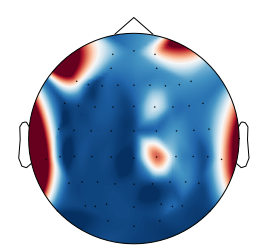

In [178]:
fig_a = mne.viz.plot_topomap(alpha_pow, info, cmap=cm.RdBu_r, contours=False)
fig_a[0].get_figure().savefig('band_power_topomap_new/alpha.png')

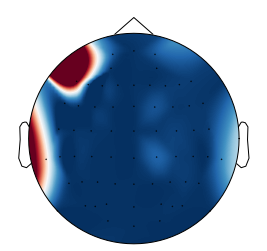

In [179]:
fig_b = mne.viz.plot_topomap(beta_pow, info, cmap=cm.RdBu_r, contours=False)
fig_b[0].get_figure().savefig('band_power_topomap_new/beta.png')

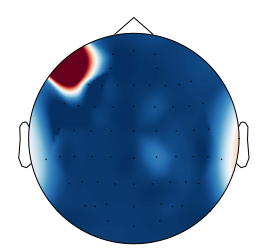

In [180]:
fig_g = mne.viz.plot_topomap(gamma_pow, info, cmap=cm.RdBu_r, contours=False)
fig_g[0].get_figure().savefig('band_power_topomap_new/.png')

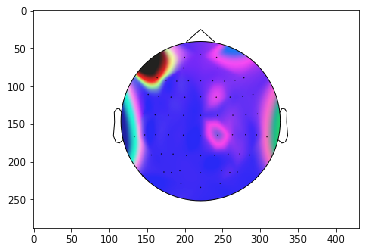

In [188]:
a_img = cv2.imread('band_power_topomap_new/alpha.png')
b_img = cv2.imread('band_power_topomap_new/beta.png')
g_img = cv2.imread('band_power_topomap_new/gamma.png')

a_img_g = cv2.cvtColor(a_img, cv2.COLOR_BGR2GRAY)
b_img_g = cv2.cvtColor(b_img, cv2.COLOR_BGR2GRAY)
g_img_g = cv2.cvtColor(g_img, cv2.COLOR_BGR2GRAY)

c_img = np.dstack((a_img_g, b_img_g, g_img_g))
# c_img = cv2.cvtColor(c_img, cv2.COLOR_BGR2GRAY)

plt.imshow(c_img, cmap=cm.RdBu)

In [167]:
psd, _ = mne.time_frequency.psd_welch(st_eeg, 4, 30, n_fft=500)

Effective window size : 1.000 (s)


In [168]:
psd_av = np.average(psd, axis=2).flatten()

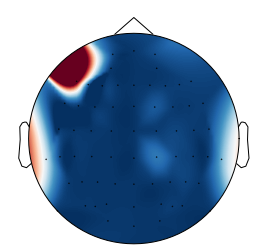

(<matplotlib.image.AxesImage at 0x7f07d42ade90>,
 <matplotlib.contour.QuadContourSet at 0x7f07d42ad810>)

In [189]:
mne.viz.plot_topomap(psd_av, info, contours=False, cmap=cm.RdBu_r)